In [1]:
from yolo_tracker import YOLOv10
from rknnlite.api import RKNNLite

rknn_lite = RKNNLite()
rknn_lite.load_rknn("../yolo10.rknn")
rknn_lite.init_runtime(core_mask=RKNNLite.NPU_CORE_0)
tracker = YOLOv10(rknn_lite)

I RKNN: [13:46:47.546] RKNN Runtime Information, librknnrt version: 2.0.0b0 (35a6907d79@2024-03-24T10:31:14)
I RKNN: [13:46:47.548] RKNN Driver Information, version: 0.8.2
W RKNN: [13:46:47.548] Current driver version: 0.8.2, recommend to upgrade the driver to the new version: >= 0.8.8
I RKNN: [13:46:47.557] RKNN Model Information, version: 6, toolkit version: 2.0.0b23+29ceb58d(compiler version: 2.0.0b23 (df183482c4@2024-07-22T01:33:03)), target: RKNPU v2, target platform: rk3588, framework name: ONNX, framework layout: NCHW, model inference type: static_shape


In [2]:
rknn_lite

In [3]:
import cv2

cap = cv2.VideoCapture("/home/orangepi/output000.mp4")
ret, frame = cap.read()

# frame = cv2.imread("/home/orangepi/yolov10_rknn_Cplusplus/examples/rknn_yolov10_demo_open/test.jpg")

In [4]:
res = tracker.run(frame)

In [5]:
res.shape

(5, 6)

In [6]:
import matplotlib.pyplot as plt

[824 551 899 690   0   0]
[902 557 981 784   0   0]
[842 621 933 857   0   0]
[ 980  644 1082  893    0    0]
[1026  713 1149  967    0    0]


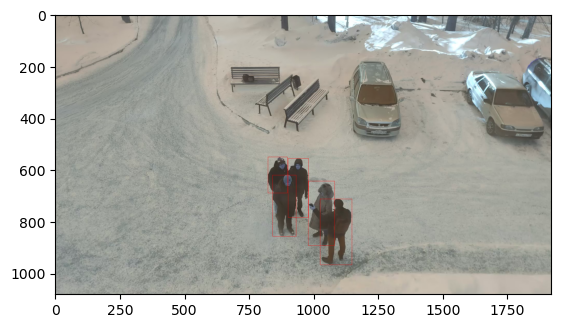

In [7]:
import numpy as np
img = frame.copy()

for bbox in res:
    bbox = bbox.astype(np.int32)
    print(bbox)
    cv2.rectangle(img, bbox[:2], bbox[2:4], (255, 0, 0), 1)
plt.imshow(img)

In [19]:
pose_rknn = RKNNLite()
pose_rknn.load_rknn("models/rtmpose_i8_V2.rknn")
pose_rknn.init_runtime(core_mask=RKNNLite.NPU_CORE_2)

I RKNN: [13:48:26.780] RKNN Runtime Information, librknnrt version: 2.0.0b0 (35a6907d79@2024-03-24T10:31:14)
I RKNN: [13:48:26.780] RKNN Driver Information, version: 0.8.2
W RKNN: [13:48:26.780] Current driver version: 0.8.2, recommend to upgrade the driver to the new version: >= 0.8.8
I RKNN: [13:48:26.780] RKNN Model Information, version: 6, toolkit version: 2.0.0b0+9bab5682(compiler version: 2.0.0b0 (35a6907d79@2024-03-24T02:34:11)), target: RKNPU v2, target platform: rk3588, framework name: ONNX, framework layout: NCHW, model inference type: static_shape


0

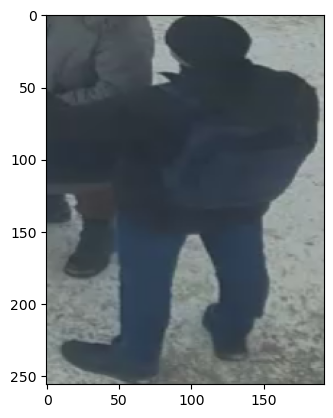

In [29]:
bbox = res[4][:4].astype(np.int32)
person = cv2.resize(frame[bbox[1]:bbox[3], bbox[0]:bbox[2]], (192, 256))
person = cv2.cvtColor(person, cv2.COLOR_BGR2RGB)
plt.imshow(person)

In [48]:
prepared = np.expand_dims(person, 0)#.astype(np.float32)
raw = pose_rknn.inference(inputs=[prepared, prepared])

x = np.argmax(raw[0][0], 1)
y = np.argmax(raw[1][0], 1)

img = person.copy()

for cx, cy in zip(x, y):
    cv2.circle(img, (cx//2, cy//2), 3, (255, 0, 0), -1)

plt.imshow(img)

E Catch exception when setting inputs.
E RKNN: [14:38:31.915] rknn_query, RKNN_QUERY_INPUT_ATTR, p_attr->index(1) >= input_num(1)!
E Traceback (most recent call last):
  File "/home/orangepi/miniconda3/envs/rapid_accel/lib/python3.10/site-packages/rknnlite/api/rknn_lite.py", line 201, in inference
    self.rknn_runtime.set_inputs(inputs, data_type, data_format, inputs_pass_through=inputs_pass_through)
  File "rknnlite/api/rknn_runtime.py", line 1002, in rknnlite.api.rknn_runtime.RKNNRuntime.set_inputs
  File "rknnlite/api/rknn_runtime.py", line 992, in rknnlite.api.rknn_runtime.RKNNRuntime.get_tensor_attr
Exception: Query tensor attribute of input node(s) failed, error code: RKNN_ERR_PARAM_INVALID



TypeError: 'NoneType' object is not subscriptable

In [46]:
raw[0][0].shape

(17, 384)

In [31]:
import scipy

In [40]:
scipy.special.softmax(raw[1][0])[..., x]

array([[1.22888494e-04, 1.21811478e-04, 1.21811478e-04, 1.19160060e-04,
        1.04420513e-04, 1.20743905e-04, 1.03050785e-04, 1.90836246e-04,
        1.03050785e-04, 1.96807348e-04, 1.08162771e-04, 1.20743905e-04,
        1.04420513e-04, 1.23975027e-04, 1.04420513e-04, 1.27292602e-04,
        1.05808438e-04],
       [1.20213634e-04, 1.19685683e-04, 1.19685683e-04, 1.18115720e-04,
        1.07214808e-04, 1.18115720e-04, 1.07214808e-04, 1.73223947e-04,
        1.05343759e-04, 1.98547452e-04, 1.08639884e-04, 1.18636744e-04,
        1.07687752e-04, 1.19685683e-04, 1.06743959e-04, 1.22348793e-04,
        1.09119108e-04],
       [1.26176994e-04, 1.26733561e-04, 1.26733561e-04, 1.26176994e-04,
        1.06743959e-04, 1.24521888e-04, 1.02598220e-04, 1.67230683e-04,
        1.00807723e-04, 1.85862547e-04, 1.06275169e-04, 1.25071165e-04,
        1.06743959e-04, 1.23975027e-04, 1.06275169e-04, 1.26733561e-04,
        1.07687752e-04],
       [1.17596988e-04, 1.17596988e-04, 1.17596988e-04, 1.165

In [47]:
x

array([183, 185, 185, 191, 263, 151, 332,  80, 341,  70, 283, 152, 262,
       133, 265, 126, 256])